In [4]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

ws = Workspace()
ds = ws.datasets['brest-cancer-data.csv']
diagnosis = ds.to_dataframe()


In [5]:
print(diagnosis.head())

       ID status  time  mean_radius  mean_texture  mean_perimeter  mean_area  \
0  119513      N    31        18.02         27.60          117.50     1013.0   
1    8423      N    61        17.99         10.38          122.80     1001.0   
2  842517      N   116        21.37         17.44          137.50     1373.0   
3  843483      N   123        11.42         20.38           77.58      386.1   
4  843584      R    27        20.29         14.34          135.10     1297.0   

   mean_smothness  mean_compactness  mean_concavity   ...    worst_perimeter  \
0         0.09489            0.1036          0.1086   ...             139.70   
1         0.11840            0.2776          0.3001   ...             184.60   
2         0.08836            0.1189          0.1255   ...             159.10   
3         0.14250            0.2839          0.2414   ...              98.87   
4         0.10030            0.1328          0.1980   ...             152.20   

   worst_area  worst_smoothness  worst

In [6]:
#Checking for missing data 
(diagnosis.astype(str) == '?').any(1)

0      False
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196     True
197    False
dtype: bool

In [8]:
# Removing rows with missing  data
diagnosis = diagnosis [~(diagnosis.astype(str) == '?').any(1)]

In [9]:
print(diagnosis.head())

       ID status  time  mean_radius  mean_texture  mean_perimeter  mean_area  \
0  119513      N    31        18.02         27.60          117.50     1013.0   
1    8423      N    61        17.99         10.38          122.80     1001.0   
2  842517      N   116        21.37         17.44          137.50     1373.0   
3  843483      N   123        11.42         20.38           77.58      386.1   
4  843584      R    27        20.29         14.34          135.10     1297.0   

   mean_smothness  mean_compactness  mean_concavity   ...    worst_perimeter  \
0         0.09489            0.1036          0.1086   ...             139.70   
1         0.11840            0.2776          0.3001   ...             184.60   
2         0.08836            0.1189          0.1255   ...             159.10   
3         0.14250            0.2839          0.2414   ...              98.87   
4         0.10030            0.1328          0.1980   ...             152.20   

   worst_area  worst_smoothness  worst

In [10]:
# Changing string values into number
diagnosis.status[diagnosis.status == "N"] = 1
diagnosis.status[diagnosis.status == "R"] = 0

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [11]:
# Dropping columns
diagnosis.drop(["ID"], axis = 1)

,status,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smothness,mean_compactness,mean_concavity,mean_concavepoints,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concavepoints,worst_symmetry,worst_fractaldim,tsize,pnodes
0,1,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,139.70,1436.0,0.11950,0.19260,0.31400,0.11700,0.2677,0.08113,5.0,5
1,1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,3.0,2
2,1,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,159.10,1949.0,0.11880,0.34490,0.34140,0.20320,0.4334,0.09067,2.5,0
3,1,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,2.0,0
4,0,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,3.5,0
5,0,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,...,107.30,733.2,0.17060,0.41960,0.59990,0.17090,0.3485,0.11790,2.5,0
7,0,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,4.0,10
8,1,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,2.0,1
9,1,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,6.0,20
10,1,123,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,2.0,0


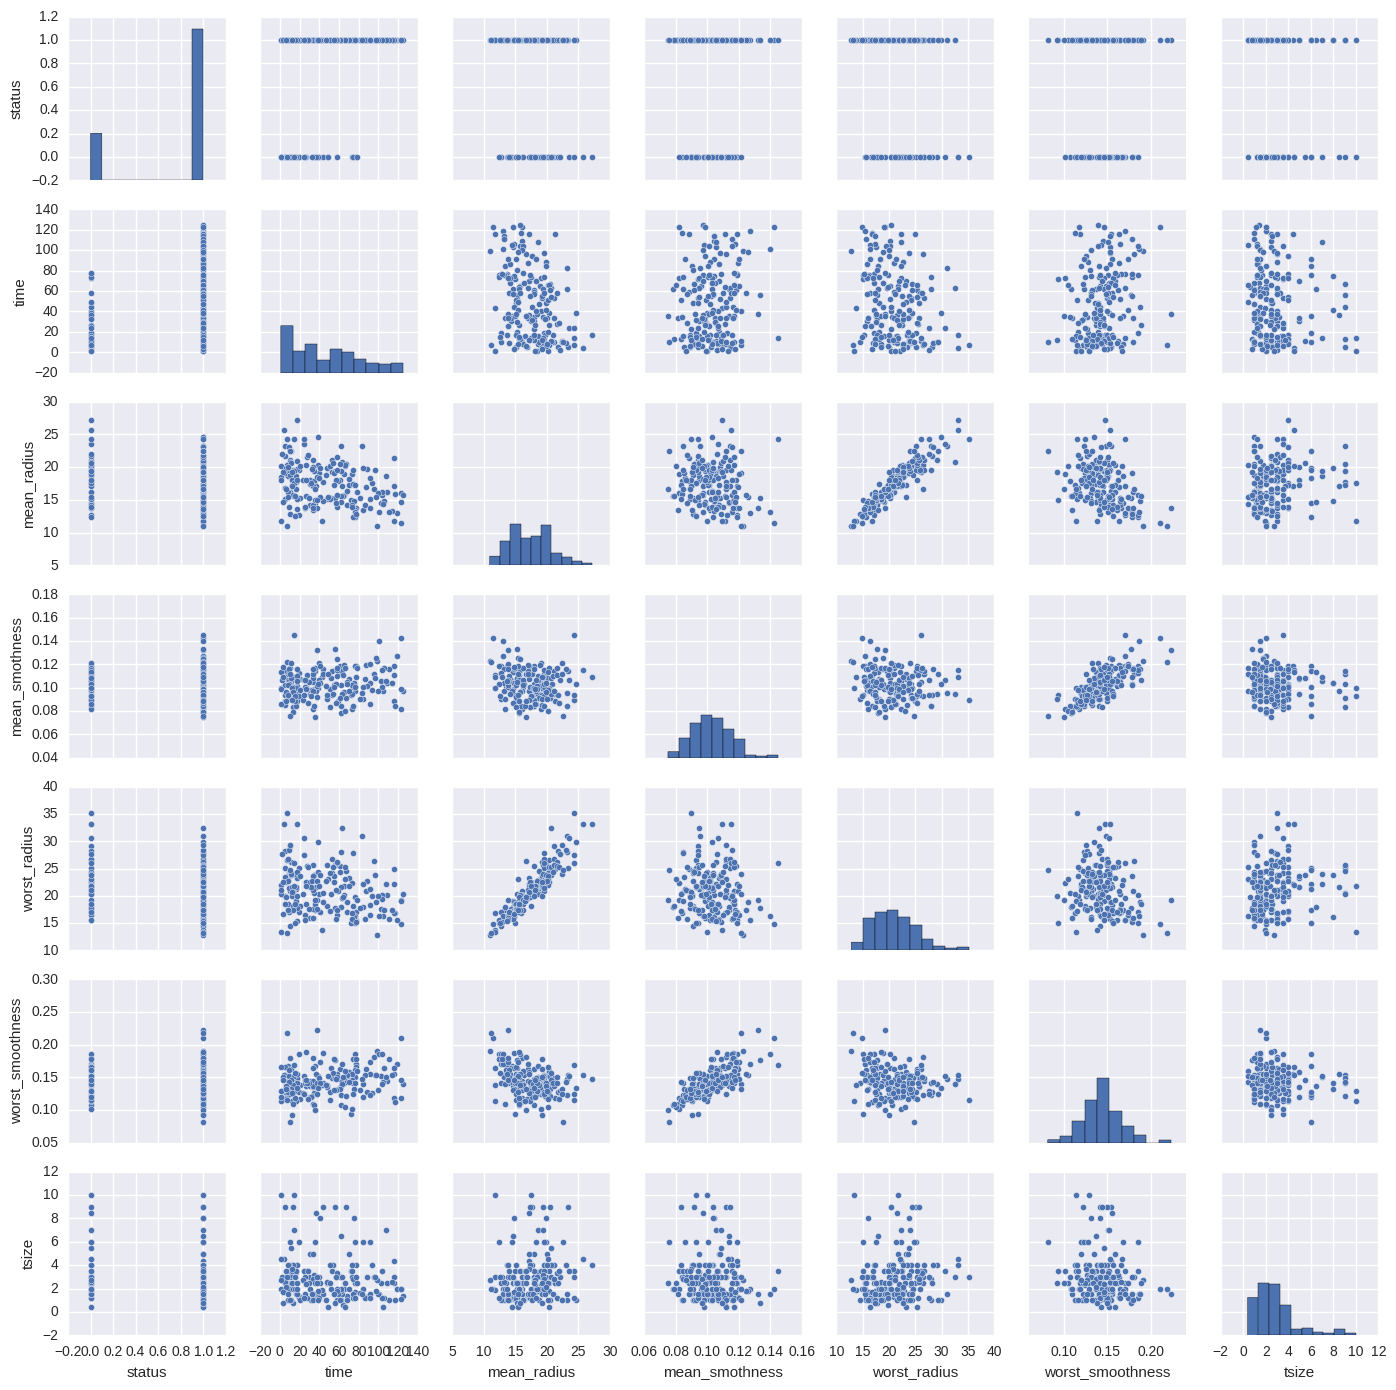

In [12]:
# plotting Pair-Wise Scatter Plot
import seaborn as sns
num_cols = ["status", "time", "mean_radius", "mean_smothness", "worst_radius", "worst_smoothness", "tsize"] 
sns.pairplot(diagnosis[num_cols], size=2)

'status'

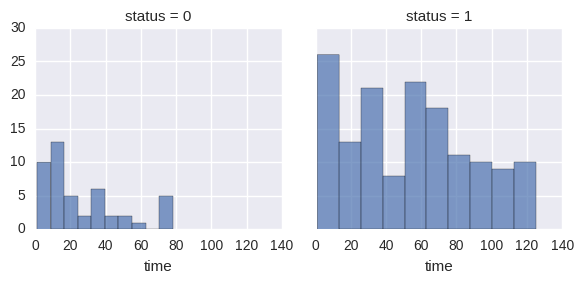

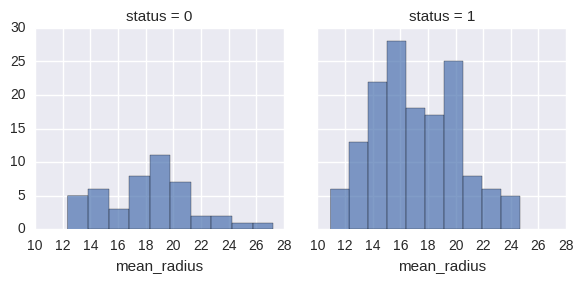

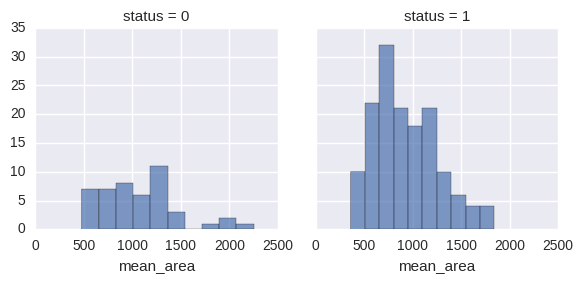

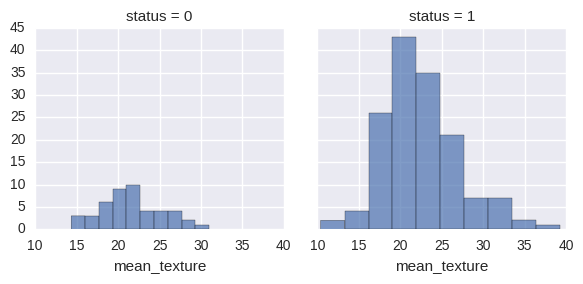

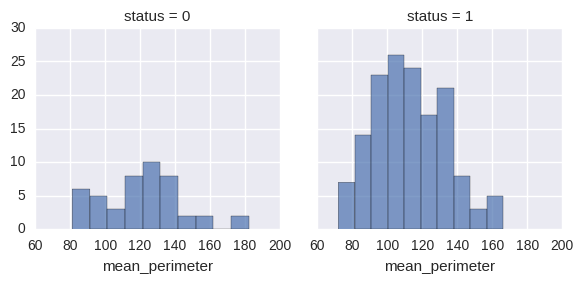

In [16]:
# plotting conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["time",
               "mean_radius",
               "mean_area",
               "mean_texture", 
              "mean_perimeter"]

cond_hists(diagnosis, plot_cols2, 'status')

'status'

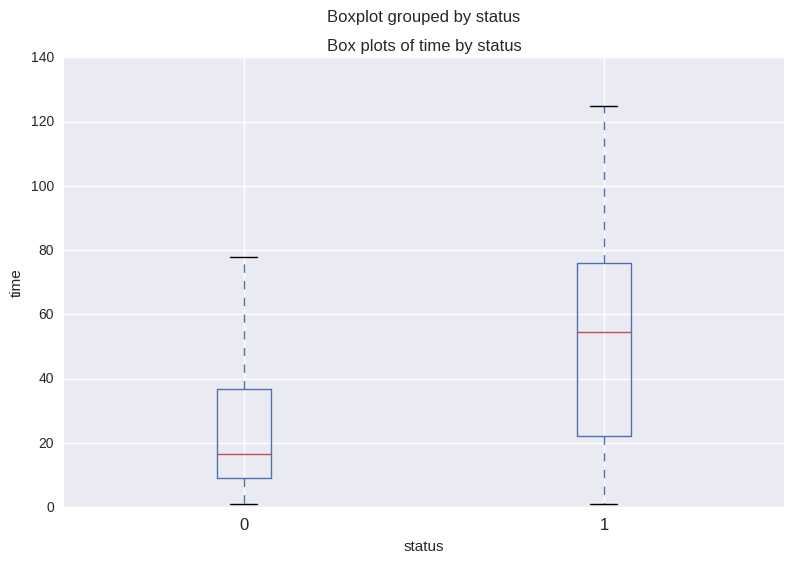

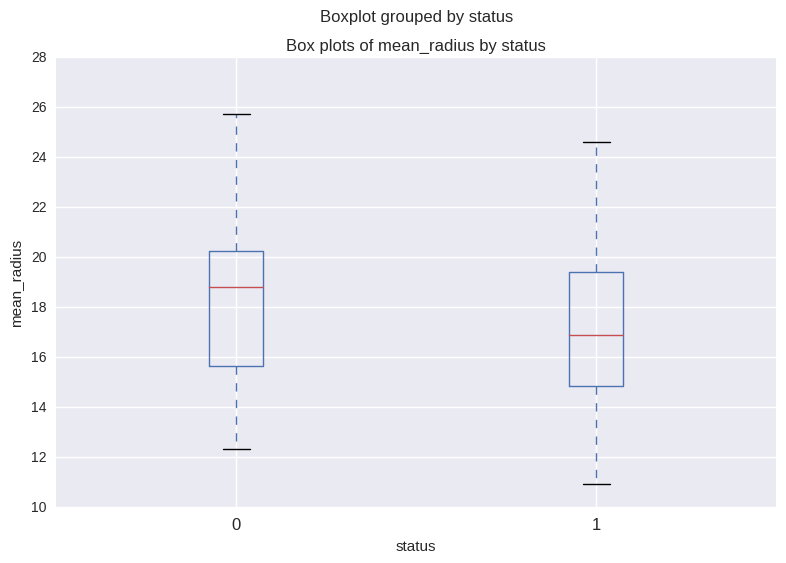

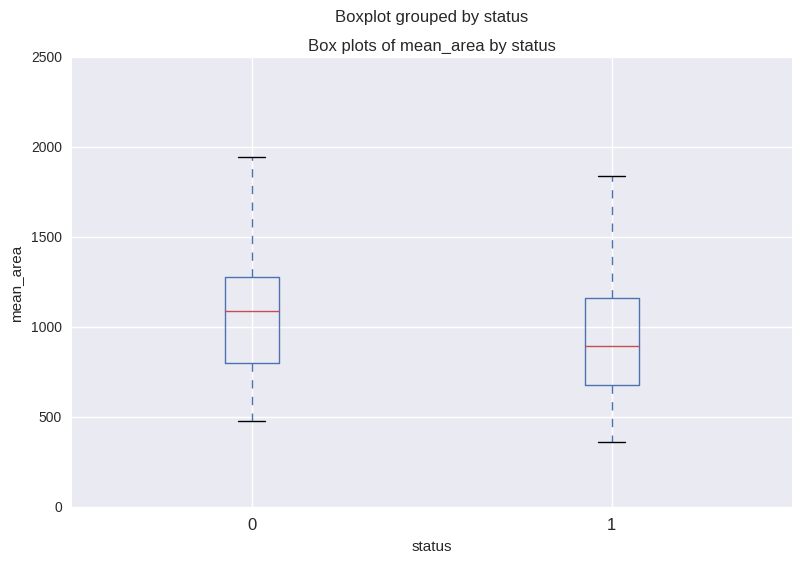

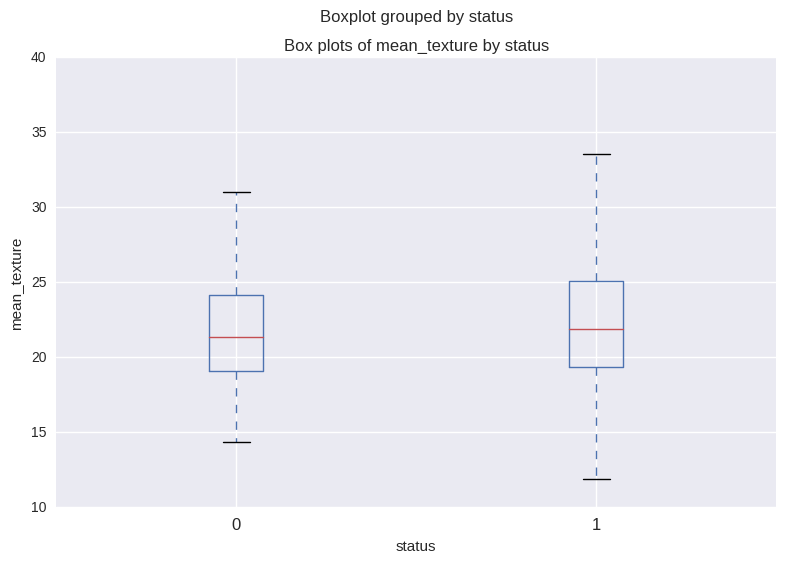

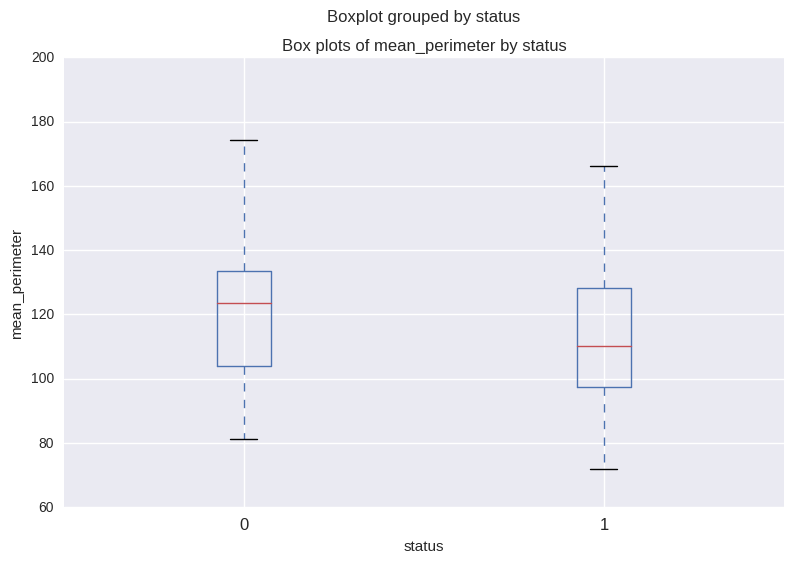

In [17]:
# plotting boxplot
def auto_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by 

auto_boxplot(diagnosis, plot_cols2, "status")

['mean_radius', 'mean_smothness', 'mean_area', 'worst_smoothness']

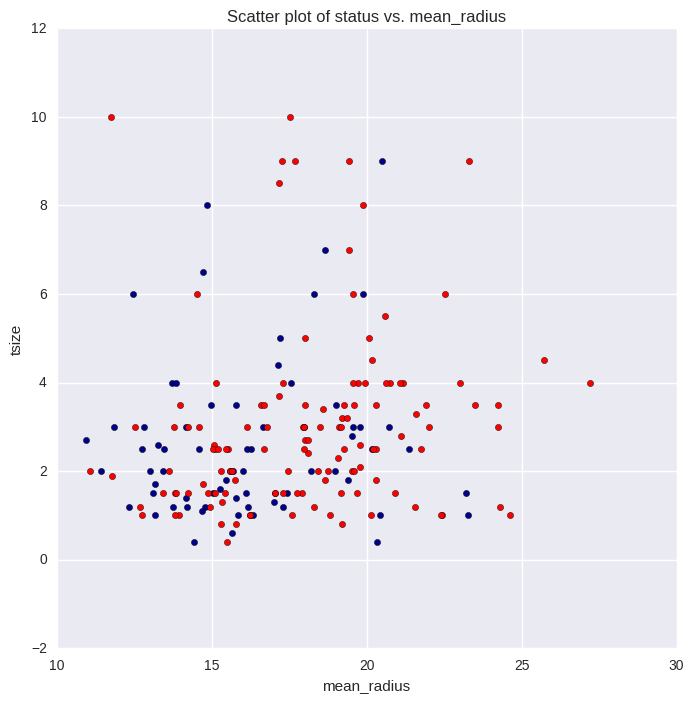

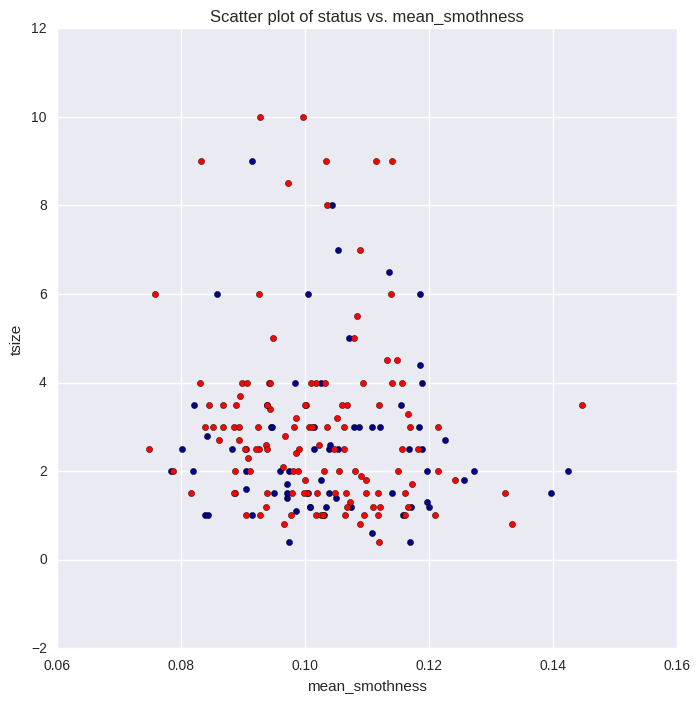

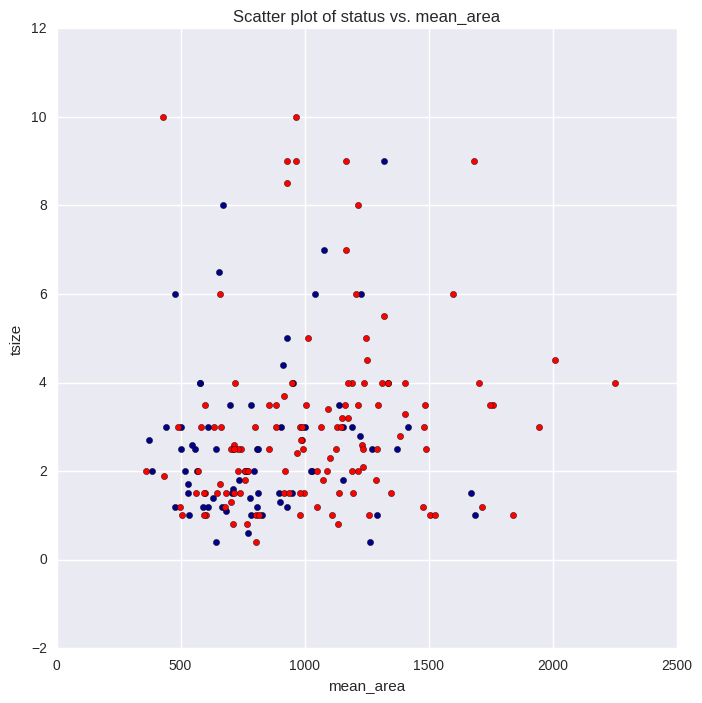

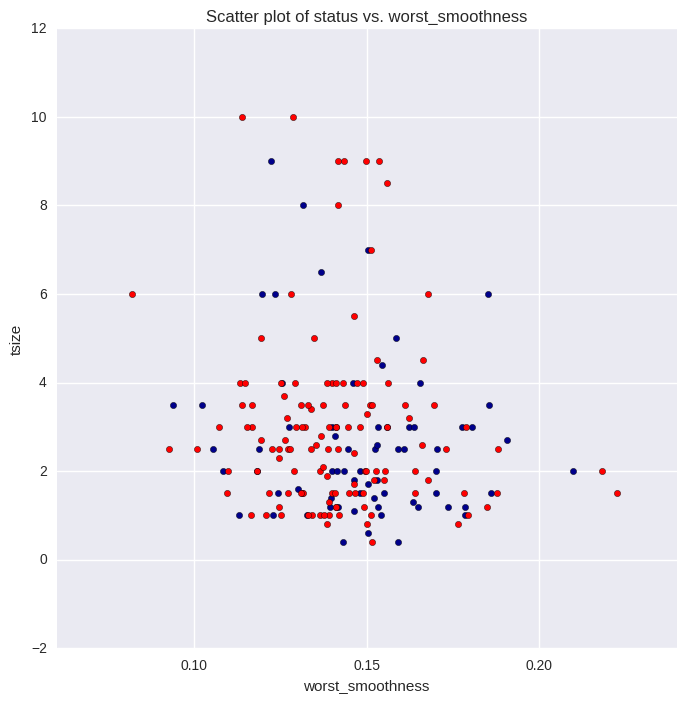

In [19]:
# plotting scatter plot
def diagnosis_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.gca()
        temp1 = df.ix[df['time'] >= 60 ]       
        temp2 = df.ix[df['time'] < 60  ]
        if temp1.shape[0] > 0:                     
            temp1.plot(kind = 'scatter', x = col, y = 'tsize' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'tsize' , 
                           ax = ax, color = 'Red') 
        ax.set_title('Scatter plot of status vs. ' + col)
    return plot_cols

## Defining columns for making scatter plots
plot_cols3 = ["mean_radius",
               "mean_smothness",
               "mean_area",
               "worst_smoothness"]

diagnosis_scatter(diagnosis, plot_cols3)